**Beam Propagation Method**   
**Author: Ramesh Bhatta, CIS, RIT**

In [1]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line

In [2]:
## Predefined plot preferences--> This is my usual plot preference

# Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

### **1. Point Spread Function of a Circular Aperture**

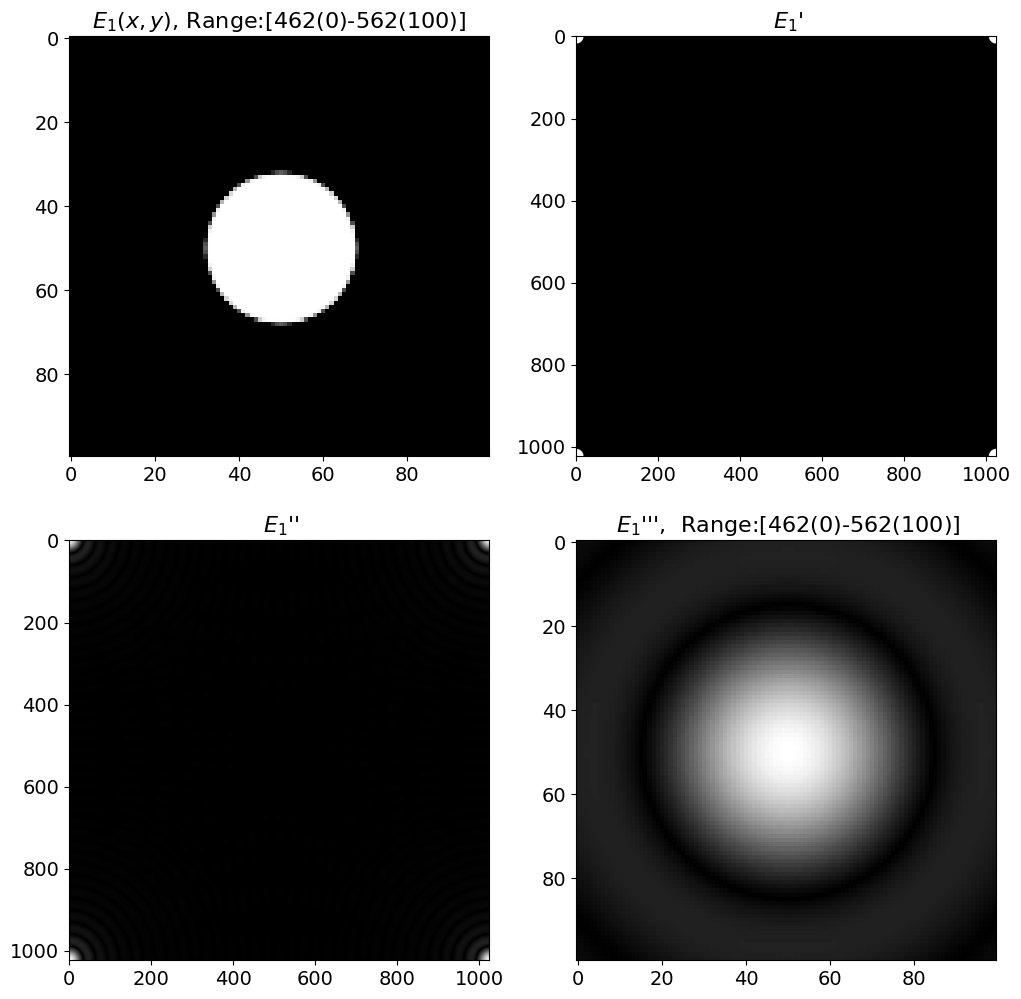

In [3]:
"""

-   Code to perform a two-dimensional (N x N pixels) “Fast Fourier Transform” (FFT) operation on the function E1(x,y) = exp(-((x2 + y2)/w2)50) 
    where x = (ix - ncen)∆x and y = (iy - ncen)∆x, w = √N/π ∆x, ncen = 1 + N/2, ix = 1,2,3,...,N and iy = 1,2,3,...,N. Let N = 1024 so
    that w = 18∆x and let ∆x = 10λ. 
-   E1 is a Circular Aperture function.
-   E'1 = fftshift(E1), E''1 = fft(E'1), E'''1 = fftshift(E''1 ).
-   The function |E'''1 |2 is called the point spread function of the aperture.

"""

## Code 

N = 1024
lamb = 1
del_x = 10 * lamb
w = 18 * del_x
n_cen = 1 + (N/2)
x,y = np.meshgrid(np.arange(1,N+1),np.arange(1,N+1))
x = (x - n_cen)* del_x
y = (y - n_cen)* del_x

E1 = np.exp(-((x**2 + y**2)/w**2)**50)
E1_prime = np.fft.fftshift(E1)

E1_doubleprime = np.fft.fft2(E1_prime)
E1_doubleprime_shifted = np.fft.fftshift(E1_doubleprime)

## Plot

fig = plt.figure(figsize = (12,12))
fig.add_subplot(221)
plt.imshow(E1[N//2-50:N//2+50,N//2-50:N//2+50] , cmap ='gray')
plt.title(r'$E_{1}(x,y)$, Range:[462(0)-562(100)]')
fig.add_subplot(222)
plt.imshow(E1_prime , cmap ='gray')
plt.title(r" $E_{1}$' ")
fig.add_subplot(223)
plt.imshow(np.abs(E1_doubleprime), cmap = 'gray')
plt.title(r" $E_{1}$'' ")
fig.add_subplot(224)
plt.imshow((np.abs(E1_doubleprime_shifted))[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(r" $E_{1}$''',  Range:[462(0)-562(100)] ")

plt.show()

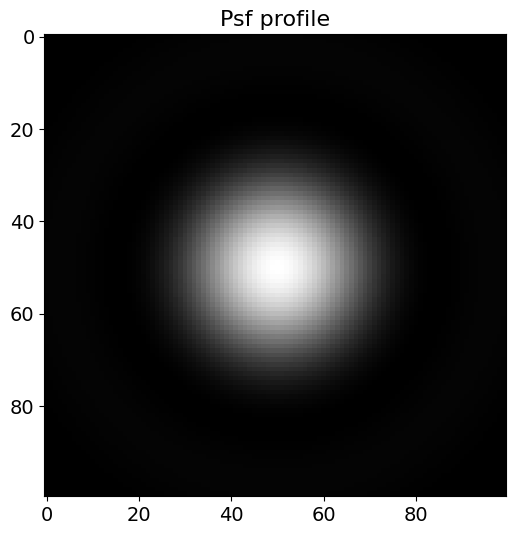

In [4]:
## PSF of the Circular Aperture

psf_E1 = (np.abs(E1_doubleprime_shifted))**2
fig = plt.figure(figsize = (6,6))
plt.imshow(psf_E1[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title("Psf profile")
plt.show()

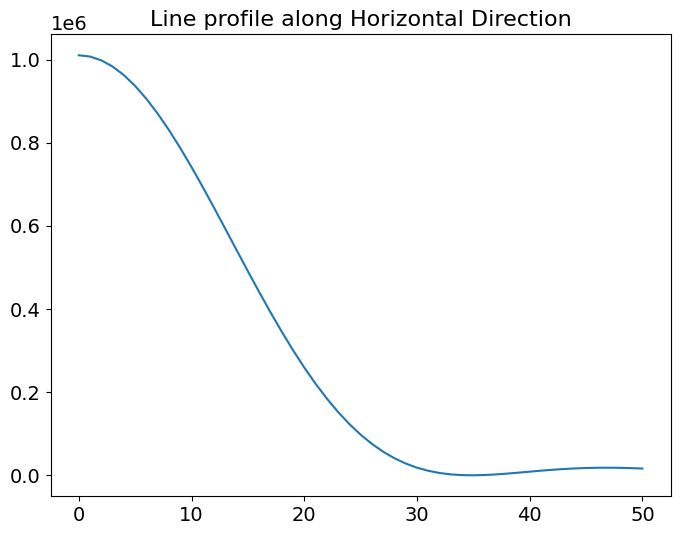

In [5]:
## Analysing the line profile of the PSF

plt.figure(figsize = (8,6))
profile = profile_line(psf_E1, (512,512),(512,562))
plt.plot(profile)
plt.title("Line profile along Horizontal Direction")
plt.show()

In [6]:
## Pixel distance between peak and first minimum

number_of_pixel = (np.where(profile==np.min(profile))[0][0]) - (np.where(profile==np.max(profile))[0][0]) 
print("The distance between peak and first minimum is : {} pixels ".format(number_of_pixel))

The distance between peak and first minimum is : 35 pixels 


#### **2. Resolving Two point Objects**

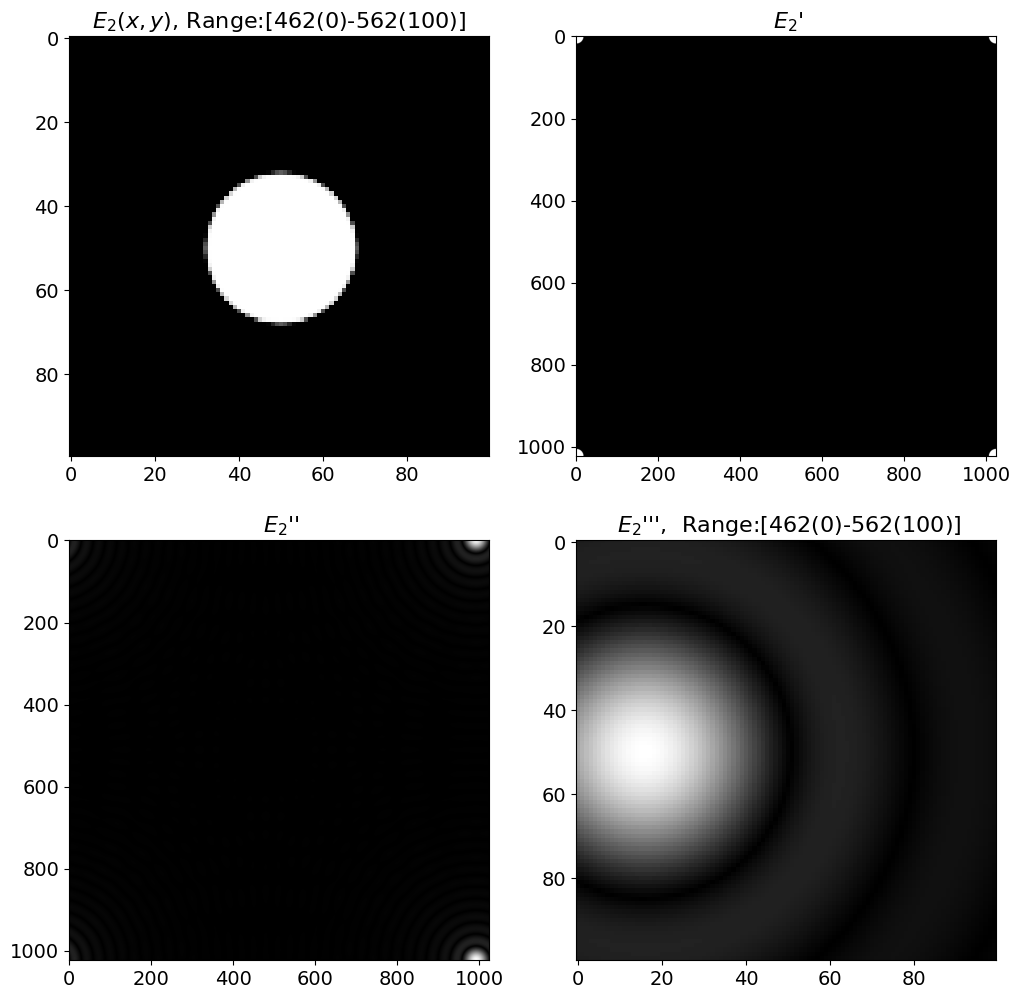

In [7]:
'''

Repeating Above Process for tilted plane wave at the aperture represented by the function E2(x,y) =(exp(-((x2 + y2)/w2)50))exp(i ̃kxx) 
where  ̃kx = (2π/λ) sin φ. Assuming λ = 1μm.

'''
phi = 0.301203
k_x = ((2*np.pi/lamb) * np.sin(phi))
E2 = E1*np.exp(1j * k_x * x)
E2_prime = np.fft.fftshift(E2)
E2_doubleprime = np.fft.fft2(E2_prime)
E2_doubleprime_shifted = np.fft.fftshift(E2_doubleprime)

## Plot

fig = plt.figure(figsize = (12,12))
fig.add_subplot(221)
plt.imshow(np.abs(E2)[N//2-50:N//2+50,N//2-50:N//2+50] , cmap ='gray')
plt.title(r'$E_{2}(x,y)$, Range:[462(0)-562(100)]')
fig.add_subplot(222)
plt.imshow(np.abs(E2_prime) , cmap ='gray')
plt.title(r" $E_{2}$' ")
fig.add_subplot(223)
plt.imshow(np.abs(E2_doubleprime), cmap = 'gray')
plt.title(r" $E_{2}$'' ")
fig.add_subplot(224)
plt.imshow((np.abs(E2_doubleprime_shifted)[N//2-50:N//2+50,N//2-50:N//2+50]), cmap = 'gray')
plt.title(r" $E_{2}$''',  Range:[462(0)-562(100)]")
plt.show()

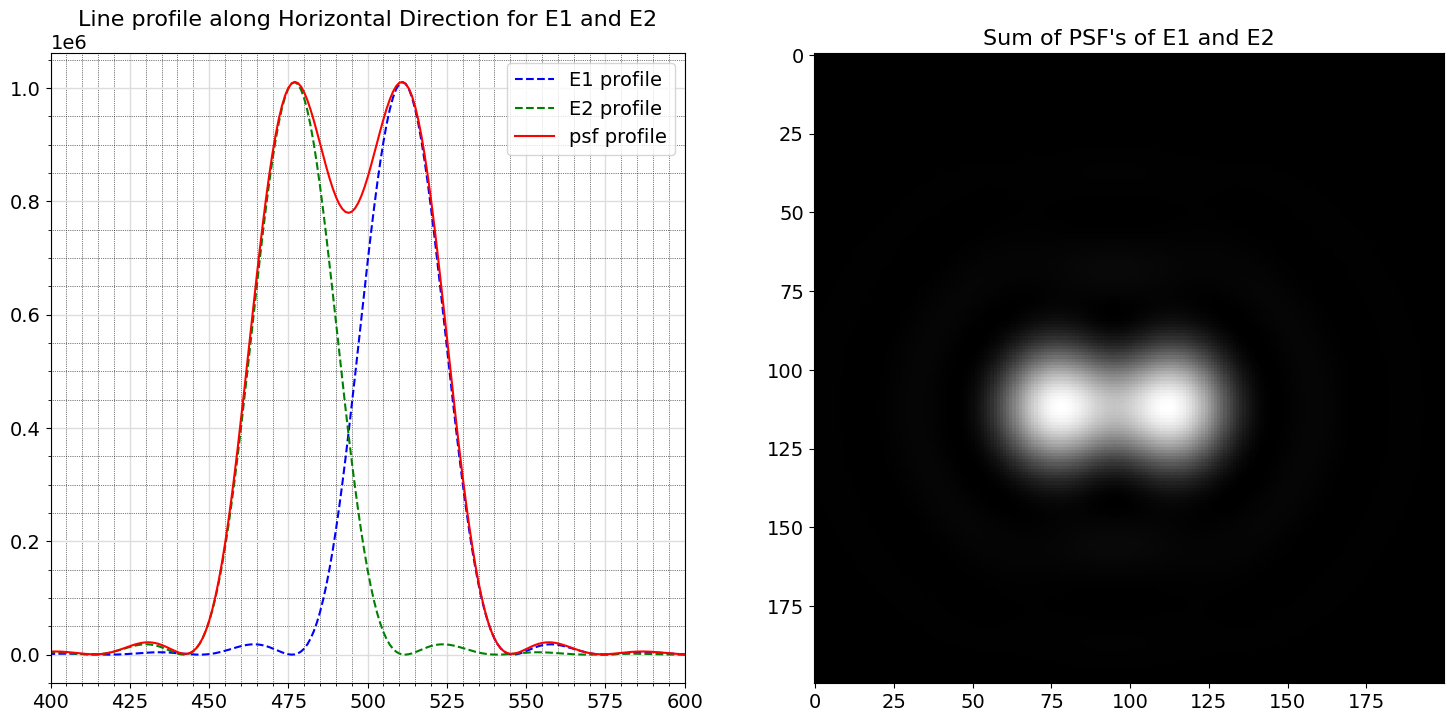

In [8]:
""" 
Taking line profile for each E1 and E2 and adjusting value of phi such that peak of psf of E2 coincide with first zero of psf of E1.
"""

# Taking the line profile

psf_E2 = (np.abs(E2_doubleprime_shifted))**2

fig = plt.figure(figsize = (18,18))
fig.add_subplot(221)
profile_E1 = profile_line(psf_E1, (512,1),(512,1024))
profile_E2 = profile_line(psf_E2, (512,1),(512,1024))
profile_psf = profile_line(psf_E2 + psf_E1, (512,1),(512,1024))
plt.plot(profile_E1,linestyle = '--', color ='blue',label = 'E1 profile')
plt.plot(profile_E2,linestyle = '--', color ='green',label = 'E2 profile')
plt.plot(profile_psf, color ='red',label = 'psf profile')
plt.xlim(400,600)
plt.legend()
plt.title("Line profile along Horizontal Direction for E1 and E2")

plt.grid(which='major', color='#DDDDDD', linewidth=1) 
plt.grid(which='minor', color='black', linestyle=':', linewidth=0.5)
plt.minorticks_on() 

fig.add_subplot(222)
plt.imshow((psf_E1 + psf_E2)[400:600,400:600],cmap = 'gray')
plt.title("Sum of PSF's of E1 and E2")
plt.show()


**Comments:**  
-   Varying the angle phi using hit and trial and looking at the linear profile plots for psf of both E1 and E2, we can see that at angle phi = 0.302, the peak of psf of E2(blue) coincide with the first minimum of psf of E1(Green). So phi = 0.301203 satisfies rayleigh criterion.

-   The Rendered Grayscale Image that shows the sum of intensities is shown in figure second figure above.

### **3. Beam Propagation: Electric field at a distance z is given using equations:**

I used following Equation and kmax = π/Δx =  π/10 using the numerical consideration provided in the references. 
All the measurements are in micrometer or in the units of lambda(1 micrometer). Magnitude Plots are zoomed at center to show the features. 

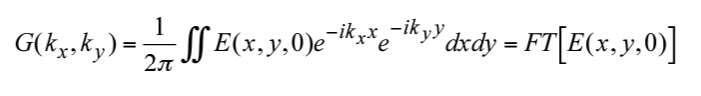


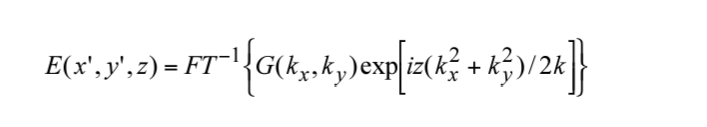




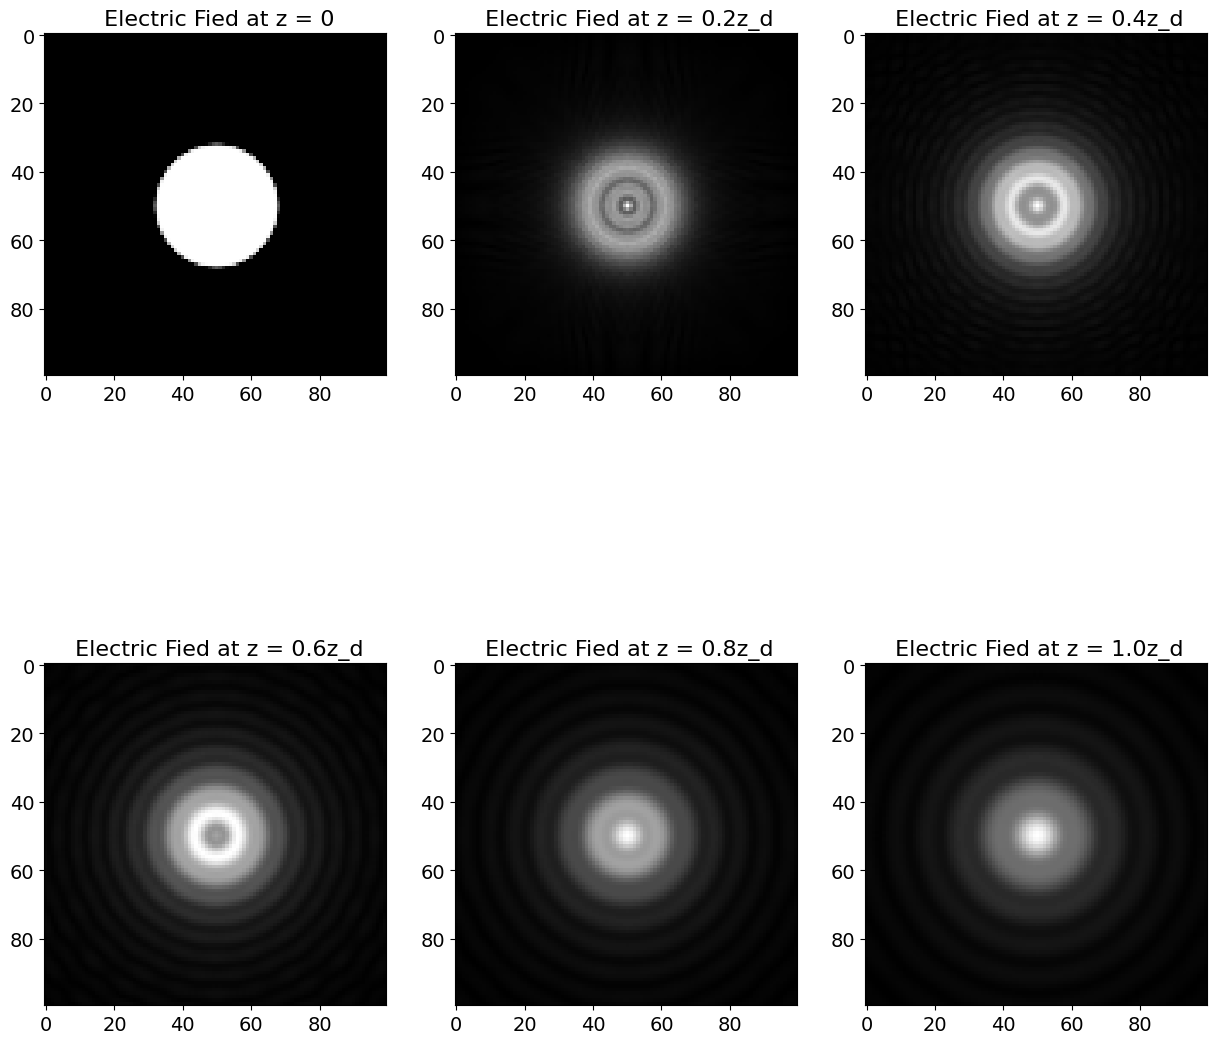

In [9]:
## 3a. Propagation to Near-field regime:

w0 = 100*lamb
k = (2*np.pi)/lamb
z_d =  0.5 * (k * w0**2)
[k_x,k_y] = np.meshgrid(np.linspace(-np.pi/10,np.pi/10,1024),np.linspace(-np.pi/10,np.pi/10,1024))
G = E1_doubleprime_shifted
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0*z_d)*(k_x**2 + k_y**2)/(2*k))))

#Figure----> Magnitude Plots
fig = plt.figure(figsize = (15,15))
fig.add_subplot(231)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 0")

fig.add_subplot(232)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.2*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 0.2z_d")

fig.add_subplot(233)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.4*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 0.4z_d")

fig.add_subplot(234)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.6*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 0.6z_d")

fig.add_subplot(235)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.8*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 0.8z_d")

fig.add_subplot(236)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(1.0*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_z)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" Electric Fied at z = 1.0z_d")
plt.show()

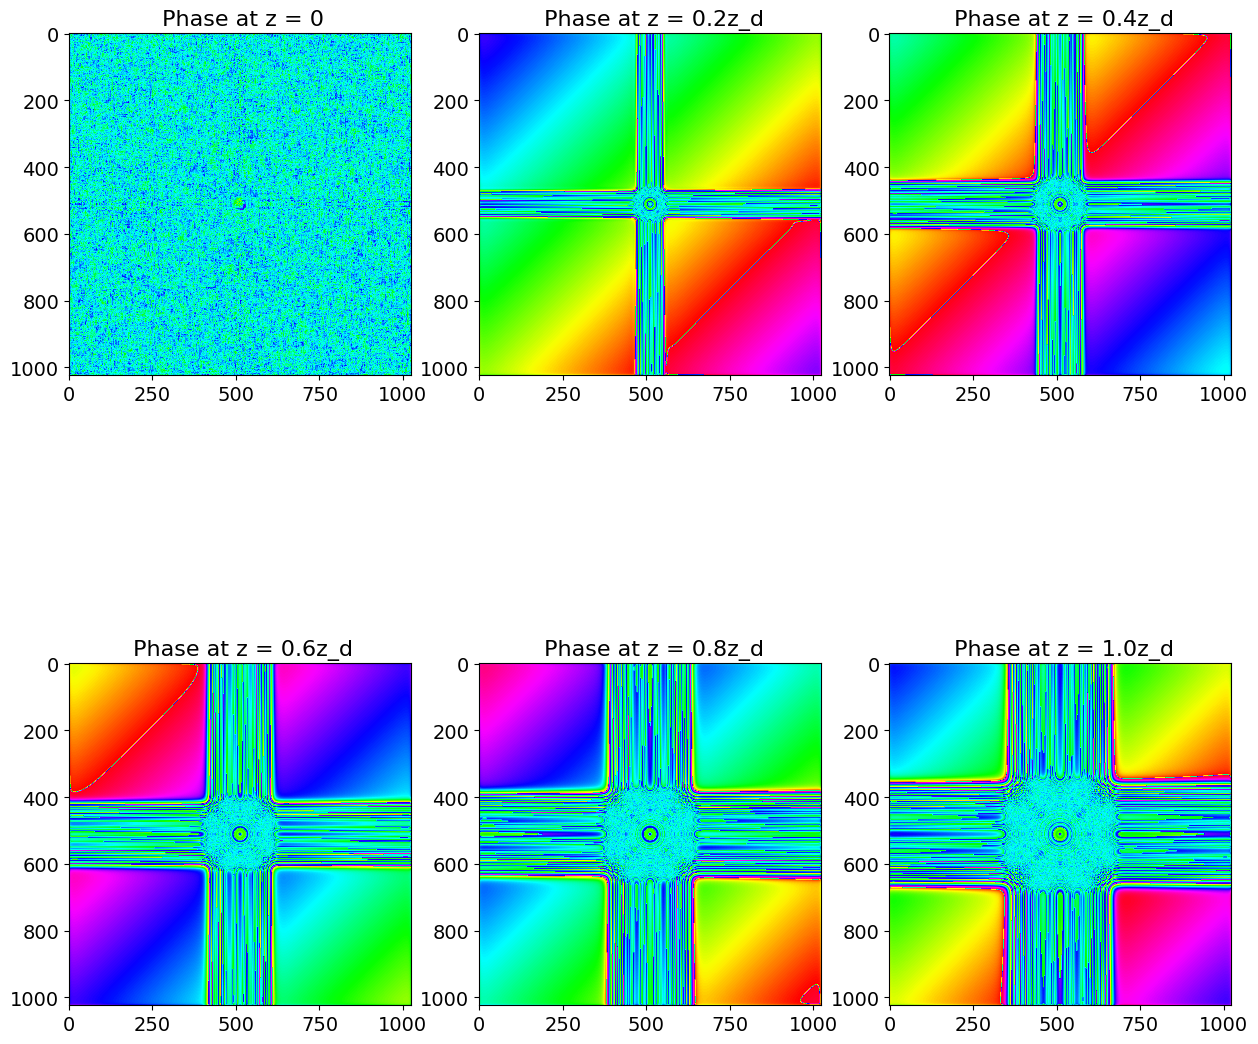

In [10]:
## 3b. Figures----> Phase Plots

fig = plt.figure(figsize = (15,15))
fig.add_subplot(231)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 0")

fig.add_subplot(232)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.2*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 0.2z_d")

fig.add_subplot(233)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.4*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 0.4z_d")

fig.add_subplot(234)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.6*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 0.6z_d")

fig.add_subplot(235)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(0.8*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 0.8z_d")

fig.add_subplot(236)
E_z = np.fft.fftshift(np.fft.ifft2(G * np.exp(1j*(1.0*z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.angle(E_z), cmap = 'hsv')
plt.title(" Phase at z = 1.0z_d")
plt.show()


###  **4: SPOT OF ARAGO:**
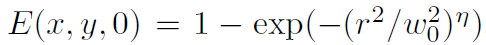

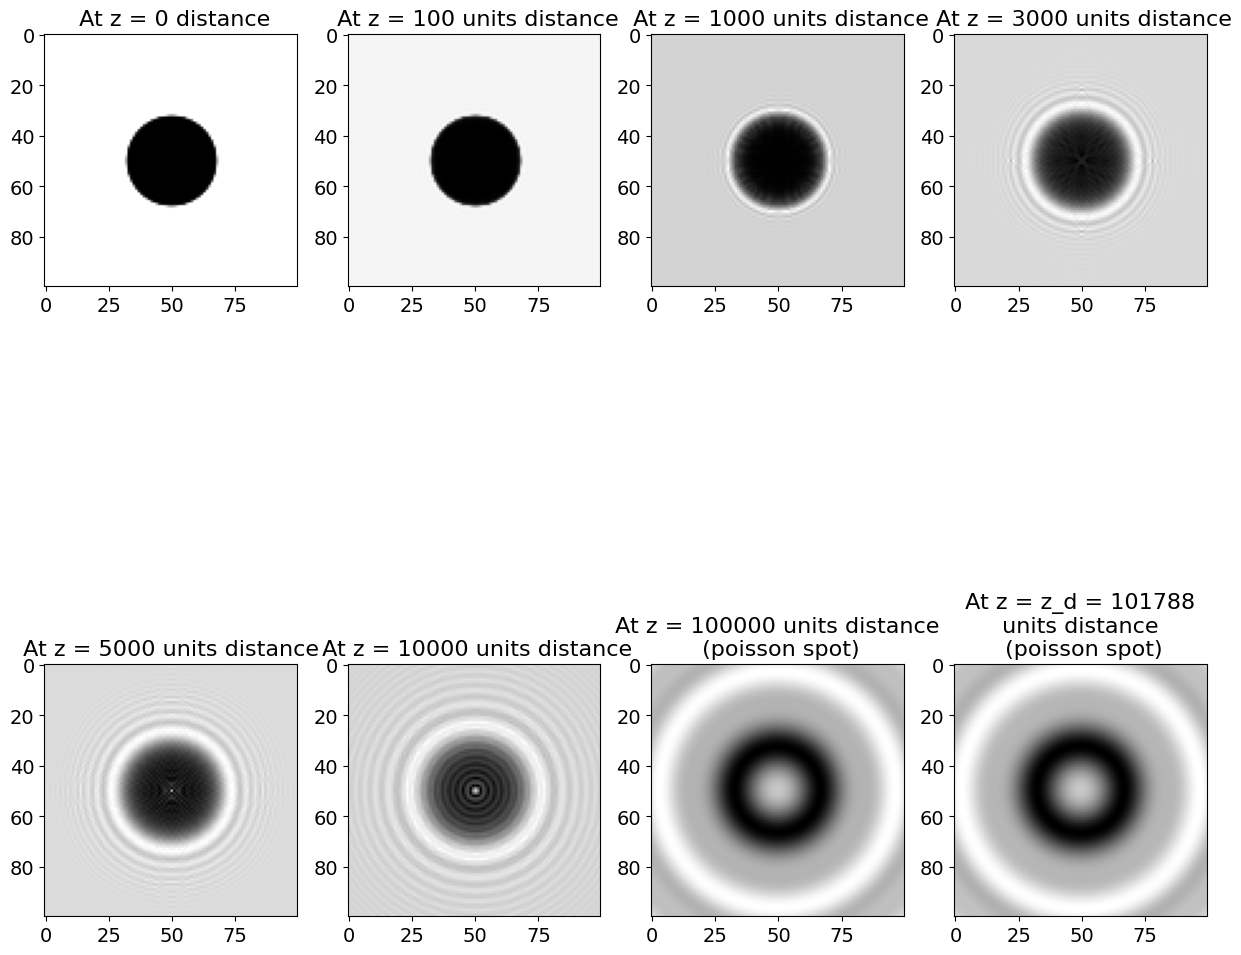

In [11]:
## ELectric field

N = 1024
lamb = 1
del_x = 10 * lamb
w0 = 18 * del_x
n_cen = 1 + (N/2)
x,y = np.meshgrid(np.arange(1,N+1),np.arange(1,N+1))
x = (x - n_cen)* del_x
y = (y - n_cen)* del_x
g = 50
E = 1 - np.exp(-((x**2 + y**2)/w0**2)**g)
E_prime = np.fft.fftshift(E)
E_doubleprime = np.fft.fft2(E_prime)
E_doubleprime_shifted = np.fft.fftshift(E_doubleprime)


##Propagating the field

k = (2*np.pi)/lamb
z_d = np.pi * (w0 **2 )/lamb
[k_x,k_y] = np.meshgrid(np.linspace(-np.pi/10,np.pi/10,1024),np.linspace(-np.pi/10,np.pi/10,1024))
F = E_doubleprime_shifted

fig = plt.figure(figsize = (15,15))
fig.add_subplot(241)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(0)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 0 distance")

fig.add_subplot(242)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(100)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 100 units distance")

fig.add_subplot(243)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(1000)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 1000 units distance")

fig.add_subplot(244)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(3000)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 3000 units distance")

fig.add_subplot(245)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(5000)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 5000 units distance ")

fig.add_subplot(246)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(10000)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 10000 units distance")

fig.add_subplot(247)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(100000)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = 100000 units distance \n (poisson spot)")

fig.add_subplot(248)
E_prop = np.fft.fftshift(np.fft.ifft2(F * np.exp(1j*(z_d)*(k_x**2 + k_y**2)/(2*k))))
plt.imshow(np.abs(E_prop)[N//2-50:N//2+50,N//2-50:N//2+50], cmap = 'gray')
plt.title(" At z = z_d = {} \n units distance \n (poisson spot)".format(round(z_d)))
plt.show()


**Comments:**  

From the above figure we can see that a central bright spot is being seen for different distances i.e. I am getting the spots at multiple distances but the one that is most precise to me is at distance 100000λ = 0.1m(second last figure) because λ = 1µm, which matches the value of zd = πw0^2/λ = 0.10m,shown in last figure. 

values used w = 18Δx, Δx = 10λ, g = 50, λ= 1 units = 1 µm.